In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Example: Apple stock
df = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
print(df.head())

/var/folders/kn/jbsdrz6s7cl9pztk42dg7l9h0000gn/T/ipykernel_56117/256804743.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538513  72.598892  71.292304  71.545890  135480400
2020-01-03  71.833298  72.594063  71.608692  71.765674  146322800
2020-01-06  72.405693  72.444336  70.703027  70.954203  118387200
2020-01-07  72.065140  72.671333  71.845362  72.415330  108872000
2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200


In [3]:
df['Target'] = df['Close'].shift(-1)  # Next day's price
df.dropna(inplace=True)

X = df[['Close']]  # Features
y = df['Target']   # Target variable


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
preds = model.predict(X_test)

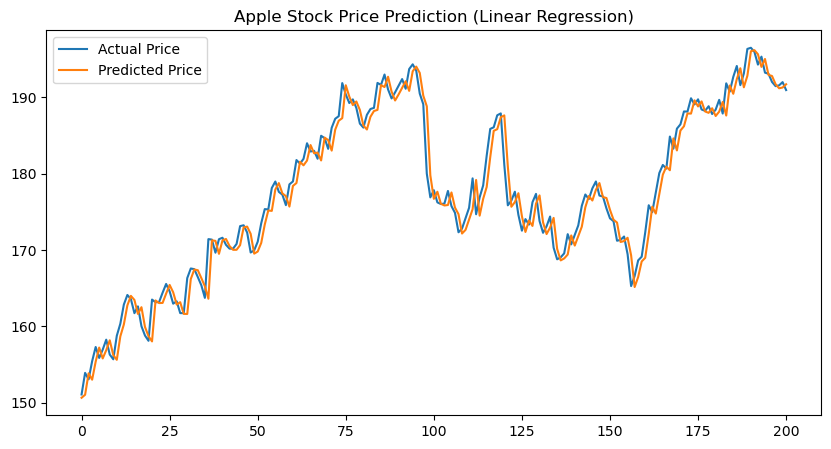

In [9]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(preds, label='Predicted Price')
plt.legend()
plt.title("Apple Stock Price Prediction (Linear Regression)")
plt.savefig("prediction-chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
results = pd.DataFrame({"Actual": y_test, "Predicted": preds})
results.to_csv("stock_predictions.csv", index=False)